In [22]:
import xarray as xr
import numpy as np
import pandas as pd

In [23]:
## Define file location
path = 'HurricaneData/'
#filename = 'air.2m.mon.mean-3.nc'
filename = 'sst.mnmean.nc'
filepath = path + filename
filepath

'HurricaneData/sst.mnmean.nc'

In [24]:
## Open dataset using xarray package
airt = xr.open_dataset(filepath)
airt

<xarray.Dataset> Size: 131MB
Dimensions:    (lat: 89, lon: 180, time: 2045, nbnds: 2)
Coordinates:
  * lat        (lat) float32 356B 88.0 86.0 84.0 82.0 ... -84.0 -86.0 -88.0
  * lon        (lon) float32 720B 0.0 2.0 4.0 6.0 ... 352.0 354.0 356.0 358.0
  * time       (time) datetime64[ns] 16kB 1854-01-01 1854-02-01 ... 2024-05-01
Dimensions without coordinates: nbnds
Data variables:
    time_bnds  (time, nbnds) float64 33kB ...
    sst        (time, lat, lon) float32 131MB ...
Attributes: (12/37)
    climatology:               Climatology is based on 1971-2000 SST, Xue, Y....
    description:               In situ data: ICOADS2.5 before 2007 and NCEP i...
    keywords_vocabulary:       NASA Global Change Master Directory (GCMD) Sci...
    keywords:                  Earth Science > Oceans > Ocean Temperature > S...
    instrument:                Conventional thermometers
    source_comment:            SSTs were observed by conventional thermometer...
    ...                        ...
    creator_url_original:      https://www.ncei.noaa.gov
    license:                   No constraints on data access or use
    comment:                   SSTs were observed by conventional thermometer...
    summary:                   ERSST.v5 is developed based on v4 after revisi...
    dataset_title:             NOAA Extended Reconstructed SST V5
    data_modified:             2024-06-03

In [25]:
## Select the 'sst' variable from the dataset
airt['sst']

<xarray.DataArray 'sst' (time: 2045, lat: 89, lon: 180)> Size: 131MB
[32760900 values with dtype=float32]
Coordinates:
  * lat      (lat) float32 356B 88.0 86.0 84.0 82.0 ... -82.0 -84.0 -86.0 -88.0
  * lon      (lon) float32 720B 0.0 2.0 4.0 6.0 8.0 ... 352.0 354.0 356.0 358.0
  * time     (time) datetime64[ns] 16kB 1854-01-01 1854-02-01 ... 2024-05-01
Attributes:
    long_name:     Monthly Means of Sea Surface Temperature
    units:         degC
    var_desc:      Sea Surface Temperature
    level_desc:    Surface
    statistic:     Mean
    dataset:       NOAA Extended Reconstructed SST V5
    parent_stat:   Individual Values
    actual_range:  [-1.8     42.32636]
    valid_range:   [-1.8 45. ]

In [26]:
airt['sst'].coords['time']

<xarray.DataArray 'time' (time: 2045)> Size: 16kB
array(['1854-01-01T00:00:00.000000000', '1854-02-01T00:00:00.000000000',
       '1854-03-01T00:00:00.000000000', ..., '2024-03-01T00:00:00.000000000',
       '2024-04-01T00:00:00.000000000', '2024-05-01T00:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 16kB 1854-01-01 1854-02-01 ... 2024-05-01
Attributes:
    long_name:        Time
    delta_t:          0000-01-00 00:00:00
    avg_period:       0000-01-00 00:00:00
    prev_avg_period:  0000-00-07 00:00:00
    standard_name:    time
    axis:             T
    actual_range:     [19723. 81935.]

In [27]:
## Clean up the lat/lon coordinates
## Convert 0 to 360 longitude to -180 to 180
airt = airt.assign_coords(lon = (((airt.lon + 180) % 360) - 180))

## Sort lat and lon coordinates in increasing order
airt = airt.sortby(airt.lon)
airt = airt.sortby(airt.lat)


In [28]:
airt['sst']

<xarray.DataArray 'sst' (time: 2045, lat: 89, lon: 180)> Size: 131MB
[32760900 values with dtype=float32]
Coordinates:
  * lat      (lat) float32 356B -88.0 -86.0 -84.0 -82.0 ... 82.0 84.0 86.0 88.0
  * time     (time) datetime64[ns] 16kB 1854-01-01 1854-02-01 ... 2024-05-01
  * lon      (lon) float32 720B -180.0 -178.0 -176.0 ... 174.0 176.0 178.0
Attributes:
    long_name:     Monthly Means of Sea Surface Temperature
    units:         degC
    var_desc:      Sea Surface Temperature
    level_desc:    Surface
    statistic:     Mean
    dataset:       NOAA Extended Reconstructed SST V5
    parent_stat:   Individual Values
    actual_range:  [-1.8     42.32636]
    valid_range:   [-1.8 45. ]

In [29]:
## Sample a time and location
airt['sst'].sel(time = '2024-02').sel(lat = 32.874622, lon = -60.277069, method = 'nearest').values

array([20.272562], dtype=float32)

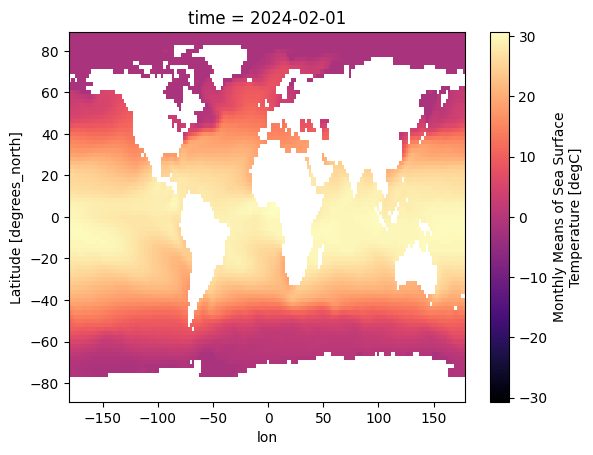

In [13]:
plotme = airt['sst'].sel(time = '2024-02')
plotme.plot(cmap = 'magma')

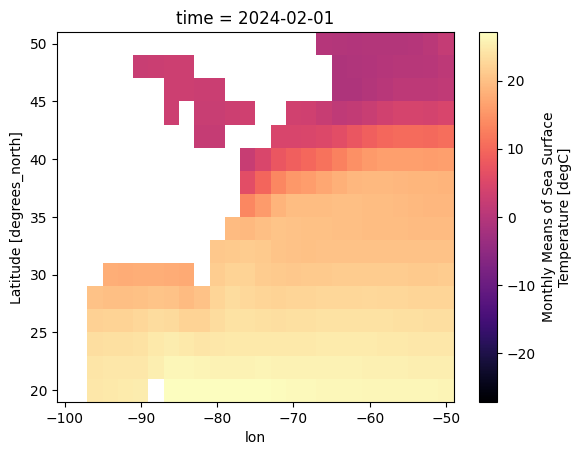

In [14]:
plotme = airt['sst'].sel(time = '2024-02').sel(lat = slice(20,50), lon = slice(-100, -50))
plotme.plot(cmap = 'magma')